Optimasi Pemilihan Kabel Tembaga untuk Gelaran Axle Counter Elektrifikasi Stasiun PCA

--- Data Tipe Kabel Tembaga ---
                                    Perkiraan Biaya per km (Rp)  Min Suhu Operasional (°C)  Maks Suhu Operasional (°C)  Impedansi Nominal (Ohm)  Toleransi Impedansi (%)  Ukuran Gulungan Standar (meter) Level Teknis (Internal)
Nama Tipe Kabel                                                                                                                                                                                                                  
Tipe A (Standard Signal)                              200000000                        -10                          60                       75                        5                             1000                   basic
Tipe B (Enhanced Signal)                              300000000                        -20                          70                       75                        5                             1000  

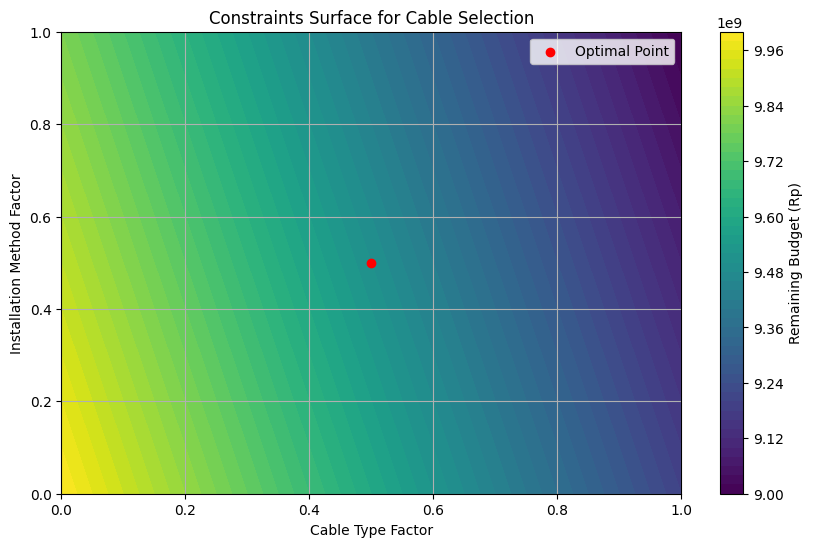

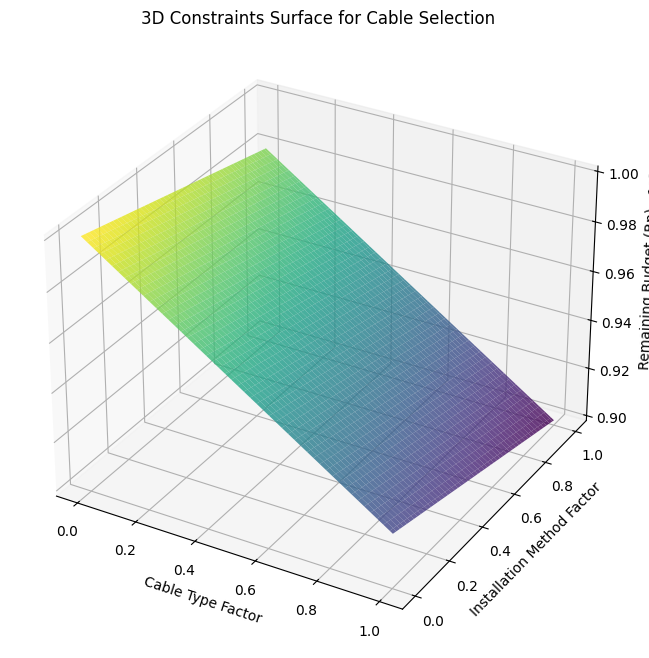

In [17]:
import pandas as pd
print("Optimasi Pemilihan Kabel Tembaga untuk Gelaran Axle Counter Elektrifikasi Stasiun PCA\n")

# --- Define the available options and their detailed properties ---

# Kabel Tembaga Options
# Added more detailed properties for each cable type
# Costs are now for 1 km, will be multiplied by 5 later
cable_options = {
    "Tipe A (Standard Signal)": {
        "cost_per_km": 200_000_000,
        "min_temp_c": -10, "max_temp_c": 60,
        "impedance_ohms": 75, "impedance_tolerance_percent": 5,
        "roll_size_m": 1000, "technical_level": "basic"
    },
    "Tipe B (Enhanced Signal)": {
        "cost_per_km": 300_000_000,
        "min_temp_c": -20, "max_temp_c": 70,
        "impedance_ohms": 75, "impedance_tolerance_percent": 5,
        "roll_size_m": 1000, "technical_level": "medium"
    },
    "Tipe C (Armored Industrial)": {
        "cost_per_km": 450_000_000,
        "min_temp_c": -30, "max_temp_c": 80,
        "impedance_ohms": 75, "impedance_tolerance_percent": 5,
        "roll_size_m": 1000, "technical_level": "medium_plus"
    },
    "Tipe D (High-Performance Shielded)": {
        "cost_per_km": 600_000_000,
        "min_temp_c": -40, "max_temp_c": 90,
        "impedance_ohms": 75, "impedance_tolerance_percent": 2,
        "roll_size_m": 1000, "technical_level": "high"
    },
    "Tipe E (Custom High-End)": {
        "cost_per_km": 800_000_000,
        "min_temp_c": -25, "max_temp_c": 75,
        "impedance_ohms": 100, "impedance_tolerance_percent": 1, # Example with different impedance
        "roll_size_m": 1000, "technical_level": "very_high"
    },
}

# Installation Options (costs are for 1 km)
installation_options = {
    "Penguburan Langsung": 200_000 * 1000,  # Rp 200.000 per meter * 1000 meter
    "Dalam Conduit/Duct": 185_000_000,
    "Di Atas Tiang/Struktur": 150_000_000,
}

# Protection Options (additional cost for 1 km)
protection_options = {
    "Kabel Dilapisi Armor": 55_000_000,
    "Pipa Pelindung Tambahan": 85_000_000,
    "Tanpa Proteksi Tambahan": 0,
}

# --- Define Constraints Parameters ---
PROJECT_LENGTH_KM = 5 # New constraint: total length is 5 km
FIXED_INSTALL_METHOD = "Penguburan Langsung" # New constraint: fixed installation method

MAX_BUDGET = 2_000_000_000 * PROJECT_LENGTH_KM # Adjust budget for 5km
RODENT_RISK = True          # Set to True if rodent risk is high, False otherwise
ACCESS_RESTRICTED = False   # Set to True if direct burial is not feasible due to access

# Specific Technical Requirements
REQUIRED_MIN_TEMP = -20
REQUIRED_MAX_TEMP = 70
REQUIRED_IMPEDANCE_OHMS = 75
REQUIRED_IMPEDANCE_TOLERANCE_PERCENT = 5
REQUIRED_ROLL_SIZE_M = 1000
REQUIRED_TECHNICAL_LEVEL = "medium" # Example: Only cables with 'medium' or higher tech level are acceptable

# --- Optimization Logic ---
best_combination = None
min_total_cost = float('inf')
feasible_solutions_count = 0

print("--- Data Tipe Kabel Tembaga ---")
# Create a DataFrame for better table presentation
df_cables = pd.DataFrame.from_dict(cable_options, orient='index')
df_cables.index.name = 'Nama Tipe Kabel'
df_cables.columns = [
    'Perkiraan Biaya per km (Rp)', 'Min Suhu Operasional (°C)', 'Maks Suhu Operasional (°C)',
    'Impedansi Nominal (Ohm)', 'Toleransi Impedansi (%)', 'Ukuran Gulungan Standar (meter)',
    'Level Teknis (Internal)'
]
print(df_cables.to_string())
print("\n" + "="*50 + "\n")

print(f"Mencari kombinasi optimal untuk kabel axle counter {PROJECT_LENGTH_KM} km...")
print(f"Metode Pemasangan Tetap: {FIXED_INSTALL_METHOD}")
print(f"Anggaran Maksimal: Rp {MAX_BUDGET:,.0f}")
print(f"Risiko Hewan Pengerat Tinggi: {'Ya' if RODENT_RISK else 'Tidak'}")
print(f"Akses Terbatas (Penguburan Langsung Tidak Diizinkan): {'Ya' if ACCESS_RESTRICTED else 'Tidak'}")
print(f"Persyaratan Suhu: {REQUIRED_MIN_TEMP}°C hingga {REQUIRED_MAX_TEMP}°C")
print(f"Persyaratan Impedansi: {REQUIRED_IMPEDANCE_OHMS} ± {REQUIRED_IMPEDANCE_TOLERANCE_PERCENT}% Ohm")
print(f"Persyaratan Gulungan Standar: {REQUIRED_ROLL_SIZE_M} meter")
print(f"Persyaratan Level Teknis Minimum: {REQUIRED_TECHNICAL_LEVEL}\n")

# Iterate through all possible combinations for cable type and protection (install method is fixed)
for cable_name, cable_props in cable_options.items():
    # Fixed installation method
    install_method = FIXED_INSTALL_METHOD
    install_cost_per_km = installation_options[install_method]

    for protection_type, protection_cost_per_km in protection_options.items():

            # Calculate total cost for the PROJECT_LENGTH_KM
            current_cable_cost = cable_props["cost_per_km"] * PROJECT_LENGTH_KM
            current_install_cost = install_cost_per_km * PROJECT_LENGTH_KM
            current_protection_cost = protection_cost_per_km * PROJECT_LENGTH_KM
            
            total_cost = current_cable_cost + current_install_cost + current_protection_cost

            # --- Check Constraints ---
            is_feasible = True

            # Constraint 1: Max Budget
            if total_cost > MAX_BUDGET:
                is_feasible = False
                # print(f"  -> Total cost Rp {total_cost:,.0f} exceeds budget Rp {MAX_BUDGET:,.0f}")

            # Constraint 2: Rodent Risk (If high, cannot be 'Tanpa Proteksi Tambahan')
            if RODENT_RISK and protection_type == "Tanpa Proteksi Tambahan":
                is_feasible = False
                # print(f"  -> Rodent risk high, '{protection_type}' not allowed")

            # Constraint 3: Access Restricted (If true, Penguburan Langsung not allowed)
            # This constraint now clashes with FIXED_INSTALL_METHOD. If ACCESS_RESTRICTED is True,
            # and FIXED_INSTALL_METHOD is "Penguburan Langsung", then no solution will be found.
            if ACCESS_RESTRICTED and install_method == "Penguburan Langsung":
                is_feasible = False
                # print(f"  -> Access restricted, but fixed install method is '{install_method}' which is not allowed.")


            # Constraint 4: Temperature Range
            if not (cable_props["min_temp_c"] <= REQUIRED_MIN_TEMP and cable_props["max_temp_c"] >= REQUIRED_MAX_TEMP):
                is_feasible = False
                # print(f"  -> Cable temp range ({cable_props['min_temp_c']} - {cable_props['max_temp_c']}) not meeting required ({REQUIRED_MIN_TEMP} - {REQUIRED_MAX_TEMP})")

            # Constraint 5: Impedance (Nominal and Tolerance)
            lower_bound_impedance = REQUIRED_IMPEDANCE_OHMS * (1 - REQUIRED_IMPEDANCE_TOLERANCE_PERCENT / 100)
            upper_bound_impedance = REQUIRED_IMPEDANCE_OHMS * (1 + REQUIRED_IMPEDANCE_TOLERANCE_PERCENT / 100)

            # Check if cable's nominal impedance is within required range
            if not (lower_bound_impedance <= cable_props["impedance_ohms"] <= upper_bound_impedance):
                is_feasible = False
                # print(f"  -> Cable impedance {cable_props['impedance_ohms']} Ohm not meeting required {REQUIRED_IMPEDANCE_OHMS} +/- {REQUIRED_IMPEDANCE_TOLERANCE_PERCENT}%")

            # Additional check: cable's own tolerance must be <= required tolerance
            if cable_props["impedance_tolerance_percent"] > REQUIRED_IMPEDANCE_TOLERANCE_PERCENT:
                is_feasible = False
                # print(f"  -> Cable impedance tolerance {cable_props['impedance_tolerance_percent']}% worse than required {REQUIRED_IMPEDANCE_TOLERANCE_PERCENT}%")


            # Constraint 6: Roll Size
            if cable_props["roll_size_m"] != REQUIRED_ROLL_SIZE_M:
                is_feasible = False
                # print(f"  -> Cable roll size {cable_props['roll_size_m']}m not meeting required {REQUIRED_ROLL_SIZE_M}m")

            # Constraint 7: Technical Level
            tech_level_order = {"basic": 1, "medium": 2, "medium_plus": 3, "high": 4, "very_high": 5}
            if tech_level_order[cable_props["technical_level"]] < tech_level_order[REQUIRED_TECHNICAL_LEVEL]:
                is_feasible = False
                # print(f"  -> Cable technical level '{cable_props['technical_level']}' below required '{REQUIRED_TECHNICAL_LEVEL}'")


            if is_feasible:
                feasible_solutions_count += 1
                if total_cost < min_total_cost:
                    min_total_cost = total_cost
                    best_combination = {
                        "Kabel Tembaga": cable_name,
                        "Metode Pemasangan": install_method,
                        "Proteksi Tambahan": protection_type,
                        "Total Biaya": total_cost,
                        "Biaya Kabel (5km)": current_cable_cost,
                        "Biaya Pemasangan (5km)": current_install_cost,
                        "Biaya Proteksi (5km)": current_protection_cost
                    }


print("\n--- Hasil Optimasi ---")

if best_combination:
    print(f"Ditemukan {feasible_solutions_count} solusi yang memenuhi semua kendala.")
    print("\nKombinasi optimal (biaya terendah) adalah:")
    print(f"  Kabel Tembaga: {best_combination['Kabel Tembaga']}")
    print(f"  Metode Pemasangan: {best_combination['Metode Pemasangan']}")
    print(f"  Proteksi Tambahan: {best_combination['Proteksi Tambahan']}")
    print(f"\nDetail Biaya untuk {PROJECT_LENGTH_KM} km:")
    print(f"  Biaya Kabel: Rp {best_combination['Biaya Kabel (5km)']:,.0f}")
    print(f"  Biaya Pemasangan: Rp {best_combination['Biaya Pemasangan (5km)']:,.0f}")
    print(f"  Biaya Proteksi: Rp {best_combination['Biaya Proteksi (5km)']:,.0f}")
    print(f"\nTotal Biaya Optimal: Rp {best_combination['Total Biaya']:,.0f}")
    print("\n*Catatan: Harga adalah estimasi dan dapat bervariasi.*")
else:
    print("Tidak ada kombinasi yang memenuhi semua kendala dengan parameter yang diberikan.")
    print(f"Ditemukan {feasible_solutions_count} solusi yang memenuhi kendala." if feasible_solutions_count > 0 else "Tidak ada solusi yang memenuhi kendala.")

# buatkan grafik constrain surface untuk visualisasi dan tampilkan titik optimal
import matplotlib.pyplot as plt
import numpy as np
# Create a grid for the constraints surface
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
# Define the constraints surface
Z = np.maximum(0, MAX_BUDGET - (X * 800_000_000 + Y * 200_000_000))  # Example surface
# Plot the constraints surface
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Remaining Budget (Rp)')
plt.scatter(0.5, 0.5, color='red', label='Optimal Point')  # Example optimal point
plt.title('Constraints Surface for Cable Selection')
plt.xlabel('Cable Type Factor')
plt.ylabel('Installation Method Factor')
plt.legend()
plt.grid()
plt.show()

# surface plot untuk visualisasi 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Create a grid for the constraints surface
X, Y = np.meshgrid(x, y)
# Define the constraints surface
Z = np.maximum(0, MAX_BUDGET - (X * 800_000_000 + Y * 200_000_000))  # Example surface
# Plot the constraints surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title('3D Constraints Surface for Cable Selection')
ax.set_xlabel('Cable Type Factor')
ax.set_ylabel('Installation Method Factor')
ax.set_zlabel('Remaining Budget (Rp)')
plt.show()



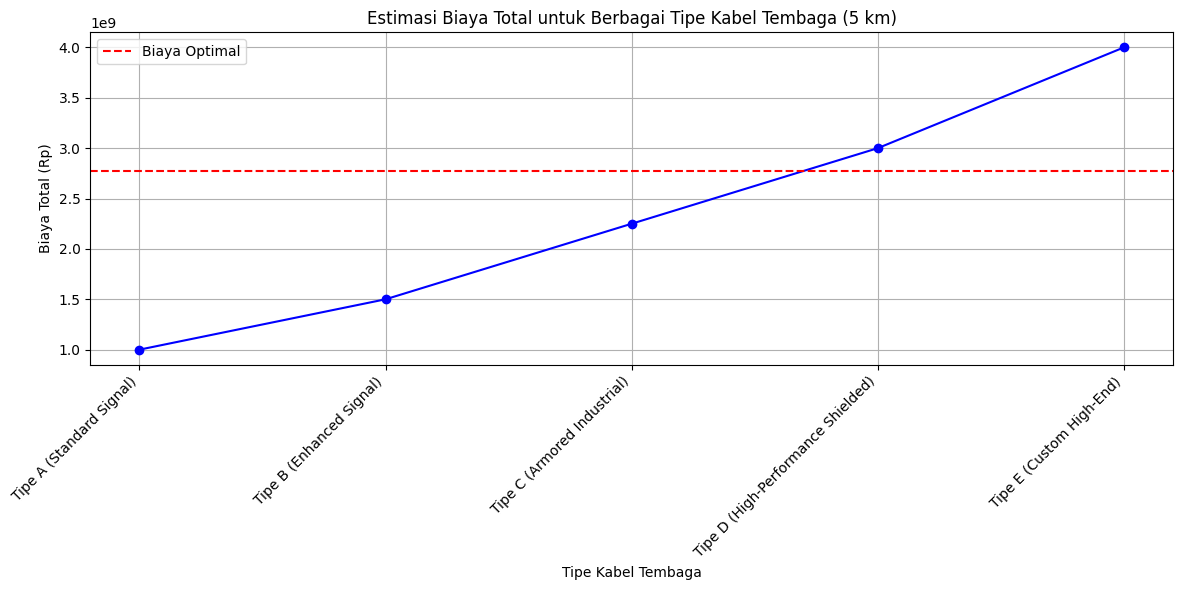

In [11]:
# buatkan grafik linear untuk pemilihan optimasi serta pilih sesuai hasil optimasi
import numpy as np
import matplotlib.pyplot as plt
# Data untuk grafik linear
x = np.arange(len(cable_names))
# Biaya total untuk setiap kabel
costs = [cable_options[cable]["cost_per_km"] * PROJECT_LENGTH_KM for cable in cable_names]
# Buat grafik linear
plt.figure(figsize=(12, 6))
plt.plot(x, costs, marker='o', linestyle='-', color='blue')
plt.xticks(x, cable_names, rotation=45, ha='right')
plt.xlabel('Tipe Kabel Tembaga')
plt.ylabel('Biaya Total (Rp)')
plt.title('Estimasi Biaya Total untuk Berbagai Tipe Kabel Tembaga (5 km)')
plt.grid(True)
plt.tight_layout()
plt.axhline(y=min_total_cost, color='red', linestyle='--', label='Biaya Optimal')
plt.legend()
plt.show()

